# Basic Preparation


In [68]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np

In [4]:
with open('fifa_data.json', 'r') as f:
  data = json.loads(f.read())

In [5]:
df = pd.DataFrame(data['matches'])
df.head()

,venue,location,status,time,fifa_id,weather,attendance,officials,stage_name,home_team_country,away_team_country,datetime,winner,winner_code,home_team,away_team,home_team_events,away_team_events,home_team_statistics,away_team_statistics,last_event_update_at,last_score_update_at
0,Moscow,Luzhniki Stadium,completed,full-time,300331503,"{'humidity': '43', 'temp_celsius': '17', 'temp...",78011,"[Nestor PITANA, Hernan MAIDANA, Juan Pablo BEL...",First stage,Russia,Saudi Arabia,2018-06-14T15:00:00Z,Russia,RUS,"{'country': 'Russia', 'code': 'RUS', 'goals': ...","{'country': 'Saudi Arabia', 'code': 'KSA', 'go...","[{'id': 5, 'type_of_event': 'goal', 'player': ...","[{'id': 12, 'type_of_event': 'substitution-in'...","{'country': 'Russia', 'attempts_on_goal': 13, ...","{'country': 'Saudi Arabia', 'attempts_on_goal'...",2018-06-21T02:36:44Z,None
1,Ekaterinburg,Ekaterinburg Arena,completed,full-time,300353632,"{'humidity': '42', 'temp_celsius': '14', 'temp...",27015,"[Bjorn KUIPERS, Sander VAN ROEKEL, Erwin ZEINS...",First stage,Egypt,Uruguay,2018-06-15T12:00:00Z,Uruguay,URU,"{'country': 'Egypt', 'code': 'EGY', 'goals': 0...","{'country': 'Uruguay', 'code': 'URU', 'goals':...","[{'id': 14, 'type_of_event': 'substitution-in'...","[{'id': 15, 'type_of_event': 'substitution-in'...","{'country': 'Egypt', 'attempts_on_goal': 8, 'o...","{'country': 'Uruguay', 'attempts_on_goal': 14,...",2018-06-21T02:37:25Z,None
2,St. Petersburg,Saint Petersburg Stadium,completed,full-time,300331526,"{'humidity': '37', 'temp_celsius': '25', 'temp...",62548,"[Cuneyt CAKIR, Bahattin DURAN, Tarik ONGUN, Se...",First stage,Morocco,Iran,2018-06-15T15:00:00Z,Iran,IRN,"{'country': 'Morocco', 'code': 'MAR', 'goals':...","{'country': 'Iran', 'code': 'IRN', 'goals': 1,...","[{'id': 23, 'type_of_event': 'yellow-card', 'p...","[{'id': 22, 'type_of_event': 'yellow-card', 'p...","{'country': 'Morocco', 'attempts_on_goal': 13,...","{'country': 'Iran', 'attempts_on_goal': 8, 'on...",2018-06-21T02:36:30Z,None
3,Sochi,Fisht Stadium,completed,full-time,300331524,"{'humidity': '74', 'temp_celsius': '24', 'temp...",43866,"[Gianluca ROCCHI, Elenito DI LIBERATORE, Mauro...",First stage,Portugal,Spain,2018-06-15T18:00:00Z,Draw,Draw,"{'country': 'Portugal', 'code': 'POR', 'goals'...","{'country': 'Spain', 'code': 'ESP', 'goals': 3...","[{'id': 36, 'type_of_event': 'goal-penalty', '...","[{'id': 37, 'type_of_event': 'yellow-card', 'p...","{'country': 'Portugal', 'attempts_on_goal': 8,...","{'country': 'Spain', 'attempts_on_goal': 12, '...",2018-06-21T02:36:18Z,2018-06-15T19:52:38Z
4,Kazan,Kazan Arena,completed,full-time,300331533,"{'humidity': '32', 'temp_celsius': '19', 'temp...",41279,"[Andres CUNHA, Nicolas TARAN, Mauricio ESPINOS...",First stage,France,Australia,2018-06-16T10:00:00Z,France,FRA,"{'country': 'France', 'code': 'FRA', 'goals': ...","{'country': 'Australia', 'code': 'AUS', 'goals...","[{'id': 52, 'type_of_event': 'goal-penalty', '...","[{'id': 50, 'type_of_event': 'yellow-card', 'p...","{'country': 'France', 'attempts_on_goal': 12, ...","{'country': 'Australia', 'attempts_on_goal': 4...",2018-06-21T02:42:39Z,2018-06-16T11:52:21Z


In [6]:
df['attendance'] = df['attendance'].astype(int)
df['attendance'].sum()

3031768

In [7]:
def extract_cells(x):
  return int(x['temp_celsius'])

df['temp_celsius'] = df['weather'].apply(extract_cells)

In [8]:
df['event_n'] = df['home_team_events'].apply(len) + df['away_team_events'].apply(len)


In [9]:
df['home_team_goals'] = df['home_team'].apply(lambda x:x['goals'])
df['away_team_goals'] = df['away_team'].apply(lambda x:x['goals'])

In [10]:
c = Counter()

for i, x in df.iterrows():
  c[x['home_team_country']] += x['home_team_goals']
  c[x['away_team_country']] += x['away_team_goals']


In [11]:
h_goals = df.groupby('home_team_country')['home_team_goals'].sum()
a_goals = df.groupby('away_team_country')['away_team_goals'].sum()
(h_goals + a_goals).sort_values(ascending=False)

home_team_country
Belgium           16
Croatia           14
France            14
England           12
Russia            11
Brazil             8
Uruguay            7
Spain              7
Japan              6
Colombia           6
Argentina          6
Portugal           6
Sweden             6
Switzerland        5
Tunisia            5
Senegal            4
Denmark            3
Korea Republic     3
Mexico             3
Nigeria            3
Iran               2
Iceland            2
Germany            2
Panama             2
Saudi Arabia       2
Egypt              2
Poland             2
Costa Rica         2
Serbia             2
Morocco            2
Australia          2
Peru               2
dtype: int64

In [12]:
df['home_team_statistics'].apply(lambda x:x['tactics']).value_counts()

4-2-3-1    33
4-4-2      10
3-4-3       6
3-5-2       5
4-3-3       4
4-5-1       3
3-4-2-1     1
5-4-1       1
4-3-2-1     1
Name: home_team_statistics, dtype: int64

In [13]:
def count_substitutions(ev_arr):
  s = 0
  for v in ev_arr:
    if v['type_of_event'].startswith('substitution'):
      s += 1
  return s

df['home_team_subst'] = df['home_team_events'].apply(count_substitutions)
df['away_team_subst'] = df['away_team_events'].apply(count_substitutions)

df.head()

,venue,location,status,time,fifa_id,weather,attendance,officials,stage_name,home_team_country,away_team_country,datetime,winner,winner_code,home_team,away_team,home_team_events,away_team_events,home_team_statistics,away_team_statistics,last_event_update_at,last_score_update_at,temp_celsius,event_n,home_team_goals,away_team_goals,home_team_subst,away_team_subst
0,Moscow,Luzhniki Stadium,completed,full-time,300331503,"{'humidity': '43', 'temp_celsius': '17', 'temp...",78011,"[Nestor PITANA, Hernan MAIDANA, Juan Pablo BEL...",First stage,Russia,Saudi Arabia,2018-06-14T15:00:00Z,Russia,RUS,"{'country': 'Russia', 'code': 'RUS', 'goals': ...","{'country': 'Saudi Arabia', 'code': 'KSA', 'go...","[{'id': 5, 'type_of_event': 'goal', 'player': ...","[{'id': 12, 'type_of_event': 'substitution-in'...","{'country': 'Russia', 'attempts_on_goal': 13, ...","{'country': 'Saudi Arabia', 'attempts_on_goal'...",2018-06-21T02:36:44Z,None,17,20,5,0,6,7
1,Ekaterinburg,Ekaterinburg Arena,completed,full-time,300353632,"{'humidity': '42', 'temp_celsius': '14', 'temp...",27015,"[Bjorn KUIPERS, Sander VAN ROEKEL, Erwin ZEINS...",First stage,Egypt,Uruguay,2018-06-15T12:00:00Z,Uruguay,URU,"{'country': 'Egypt', 'code': 'EGY', 'goals': 0...","{'country': 'Uruguay', 'code': 'URU', 'goals':...","[{'id': 14, 'type_of_event': 'substitution-in'...","[{'id': 15, 'type_of_event': 'substitution-in'...","{'country': 'Egypt', 'attempts_on_goal': 8, 'o...","{'country': 'Uruguay', 'attempts_on_goal': 14,...",2018-06-21T02:37:25Z,None,14,15,0,1,6,6
2,St. Petersburg,Saint Petersburg Stadium,completed,full-time,300331526,"{'humidity': '37', 'temp_celsius': '25', 'temp...",62548,"[Cuneyt CAKIR, Bahattin DURAN, Tarik ONGUN, Se...",First stage,Morocco,Iran,2018-06-15T15:00:00Z,Iran,IRN,"{'country': 'Morocco', 'code': 'MAR', 'goals':...","{'country': 'Iran', 'code': 'IRN', 'goals': 1,...","[{'id': 23, 'type_of_event': 'yellow-card', 'p...","[{'id': 22, 'type_of_event': 'yellow-card', 'p...","{'country': 'Morocco', 'attempts_on_goal': 13,...","{'country': 'Iran', 'attempts_on_goal': 8, 'on...",2018-06-21T02:36:30Z,None,25,20,0,1,7,8
3,Sochi,Fisht Stadium,completed,full-time,300331524,"{'humidity': '74', 'temp_celsius': '24', 'temp...",43866,"[Gianluca ROCCHI, Elenito DI LIBERATORE, Mauro...",First stage,Portugal,Spain,2018-06-15T18:00:00Z,Draw,Draw,"{'country': 'Portugal', 'code': 'POR', 'goals'...","{'country': 'Spain', 'code': 'ESP', 'goals': 3...","[{'id': 36, 'type_of_event': 'goal-penalty', '...","[{'id': 37, 'type_of_event': 'yellow-card', 'p...","{'country': 'Portugal', 'attempts_on_goal': 8,...","{'country': 'Spain', 'attempts_on_goal': 12, '...",2018-06-21T02:36:18Z,2018-06-15T19:52:38Z,24,20,3,3,6,6
4,Kazan,Kazan Arena,completed,full-time,300331533,"{'humidity': '32', 'temp_celsius': '19', 'temp...",41279,"[Andres CUNHA, Nicolas TARAN, Mauricio ESPINOS...",First stage,France,Australia,2018-06-16T10:00:00Z,France,FRA,"{'country': 'France', 'code': 'FRA', 'goals': ...","{'country': 'Australia', 'code': 'AUS', 'goals...","[{'id': 52, 'type_of_event': 'goal-penalty', '...","[{'id': 50, 'type_of_event': 'yellow-card', 'p...","{'country': 'France', 'attempts_on_goal': 12, ...","{'country': 'Australia', 'attempts_on_goal': 4...",2018-06-21T02:42:39Z,2018-06-16T11:52:21Z,19,20,2,1,6,6


In [236]:
h_subst = df.groupby('home_team_country', as_index=False)['home_team_subst'].agg(['sum', 'size'])
a_subst = df.groupby('away_team_country', as_index=False)['away_team_subst'].agg(['sum', 'size'])

home_subst = df.groupby('home_team_country', as_index=False)['home_team_subst'].sum()
away_subst = df.groupby('away_team_country', as_index=False)['away_team_subst'].sum()

mean_subst = h_subst + a_subst

mean_subst['mean'] = mean_subst['sum'] / mean_subst['size']

mean_subst.sort_values(by='mean', ascending=False)

,home_team_country,home_team_subst
0,Argentina,12
1,Australia,6
2,Belgium,22
3,Brazil,24
4,Colombia,14
5,Costa Rica,6
6,Croatia,22
7,Denmark,10
8,Egypt,6
9,England,10


In [15]:
df['goals_n'] = df['home_team_goals'] + df['away_team_goals']

In [232]:
cntryWin = dict()
country = list()
wins = list()
for i in df['winner']:
  if i not in cntryWin:
    cntryWin[i] = 1
  else:
    cntryWin[i] += 1
for i in cntryWin.items():
  country.append(i[0])
  wins.append(i[1])

In [116]:
s = len(mean_subst)
cntry = list()
for i in range(s):
  cntry.append(mean_subst.index[i]) 
k = 0
cntrySum = list()
for i in cntry:
  cntrySum.append(mean_subst[i:]['sum'][0])

In [229]:
htg = df.groupby('home_team_country', as_index=False)['home_team_goals'].sum()
atg = df.groupby('away_team_country', as_index=False)['away_team_goals'].sum()

# Project Tasks

**№1**

In [17]:
print('Mean value for temperature:', df['temp_celsius'].mean())
print('Median value for temperature:', df['temp_celsius'].median())
print('Standard deviation for temperature:', df['temp_celsius'].std())

Mean value for temperature: 23.75
Median value for temperature: 24.0
Standart deviation for temperature: 5.312459150169742


In [18]:
print('Mean value for number of events:', df['event_n'].mean())
print('Median value for number of events:', df['event_n'].median())
print('Standard deviation for number of events:', df['event_n'].std())

Mean value for number of events: 18.734375
Median value for number of events: 19.0
Standart deviation for number of events: 3.613212910926028


In [19]:
print('Mean value for number of goals:', df['goals_n'].mean())
print('Median value for number of goals:', df['goals_n'].median())
print('Standard deviation for number of goals:', df['goals_n'].std())

Mean value for number of goals: 2.640625
Median value for number of goals: 2.0
Standart deviation for number of goals: 1.5772911025623084


**№2**

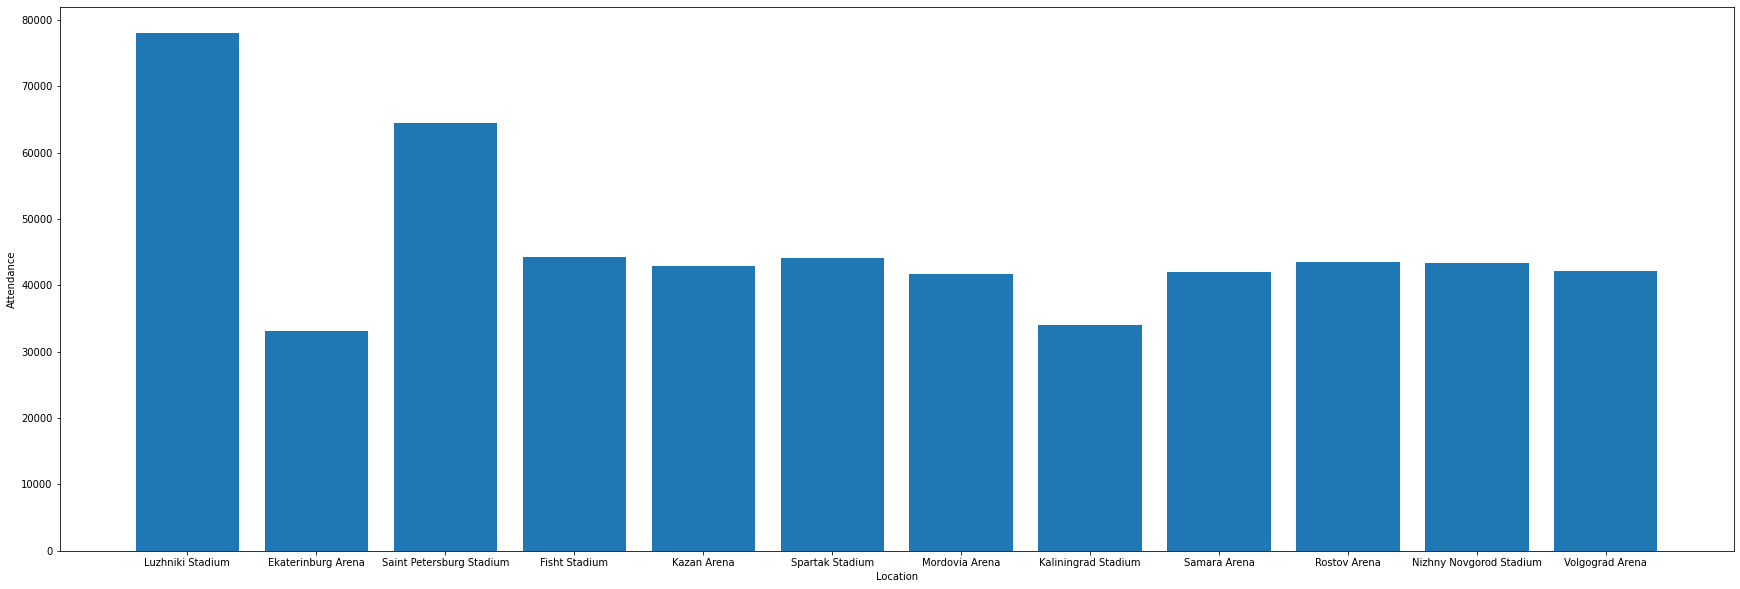

In [20]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)
ax.bar(df['location'], df['attendance'])
plt.xlabel('Location')
plt.ylabel('Attendance')
plt.show()

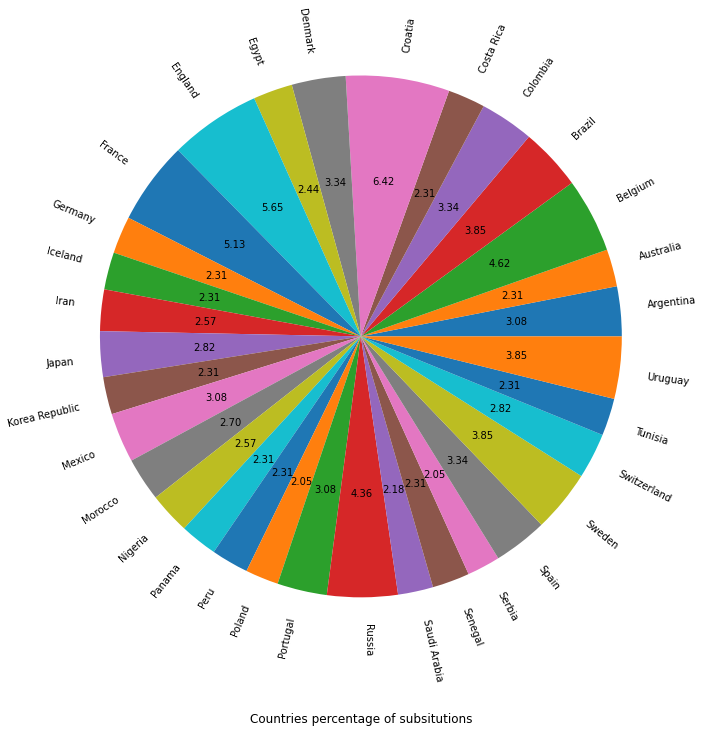

In [176]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pie(cntrySum, labels=cntry, rotatelabels=True, radius=3, autopct='%.2f')
plt.title('Countries percentage of substitutions', y=-1.3)
plt.show()

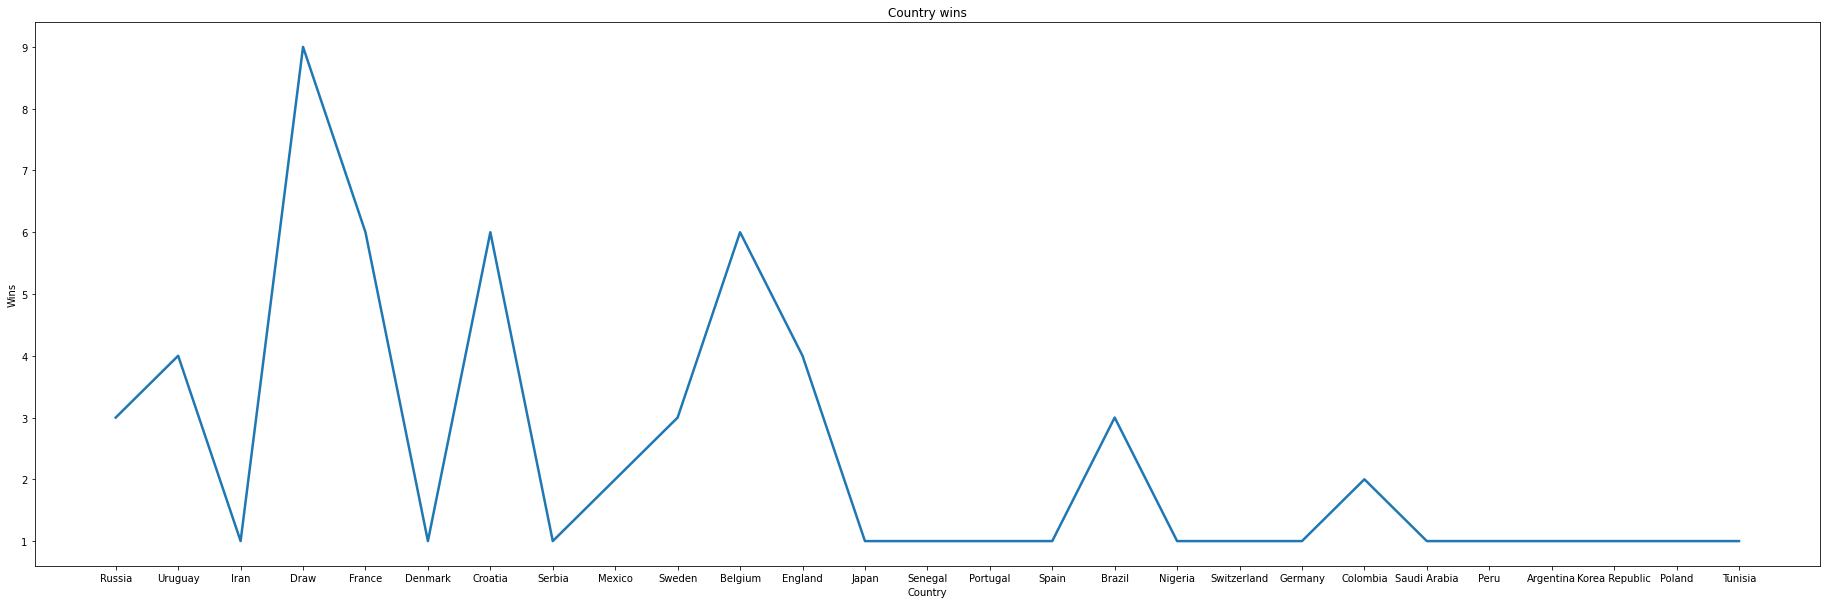

In [222]:
fig = plt.figure(figsize=(32, 10))
ax = fig.add_subplot(111)
ax.plot(country, wins, linewidth=2.5)
ax.set_title('Country wins')
plt.xlabel('Country')
plt.ylabel('Wins')
plt.show()

**№3**

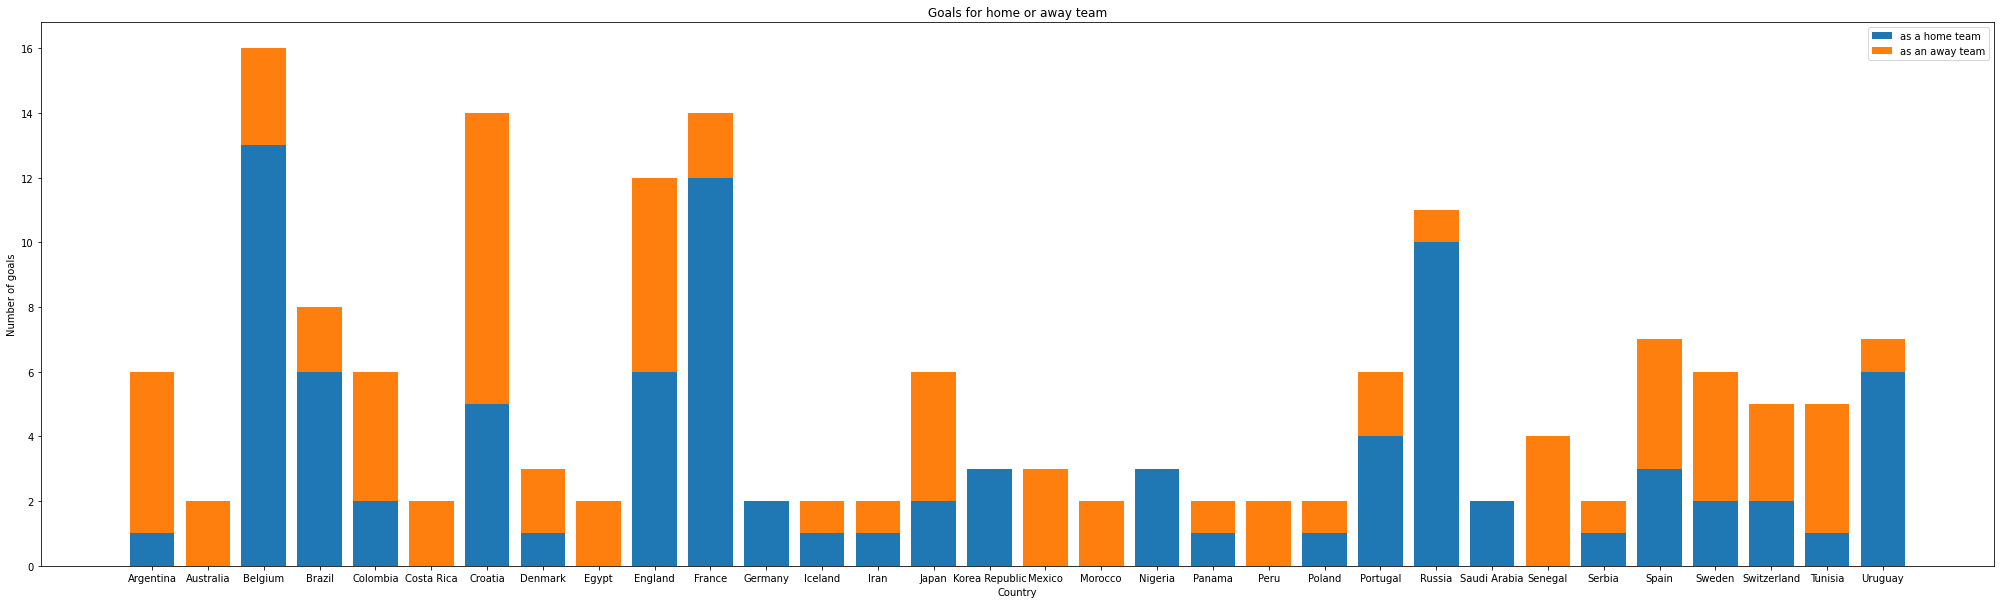

In [218]:
fig = plt.figure(figsize=(35, 10))
ax = fig.add_subplot(111)

ax.bar(htg['home_team_country'], htg['home_team_goals'])
ax.bar(atg['away_team_country'], atg['away_team_goals'], bottom = htg['home_team_goals'])

ax.legend(['as a home team', 'as an away team'])
ax.set_title('Goals for home or away team')
plt.ylabel('Number of goals')
plt.xlabel('Country')

plt.show()

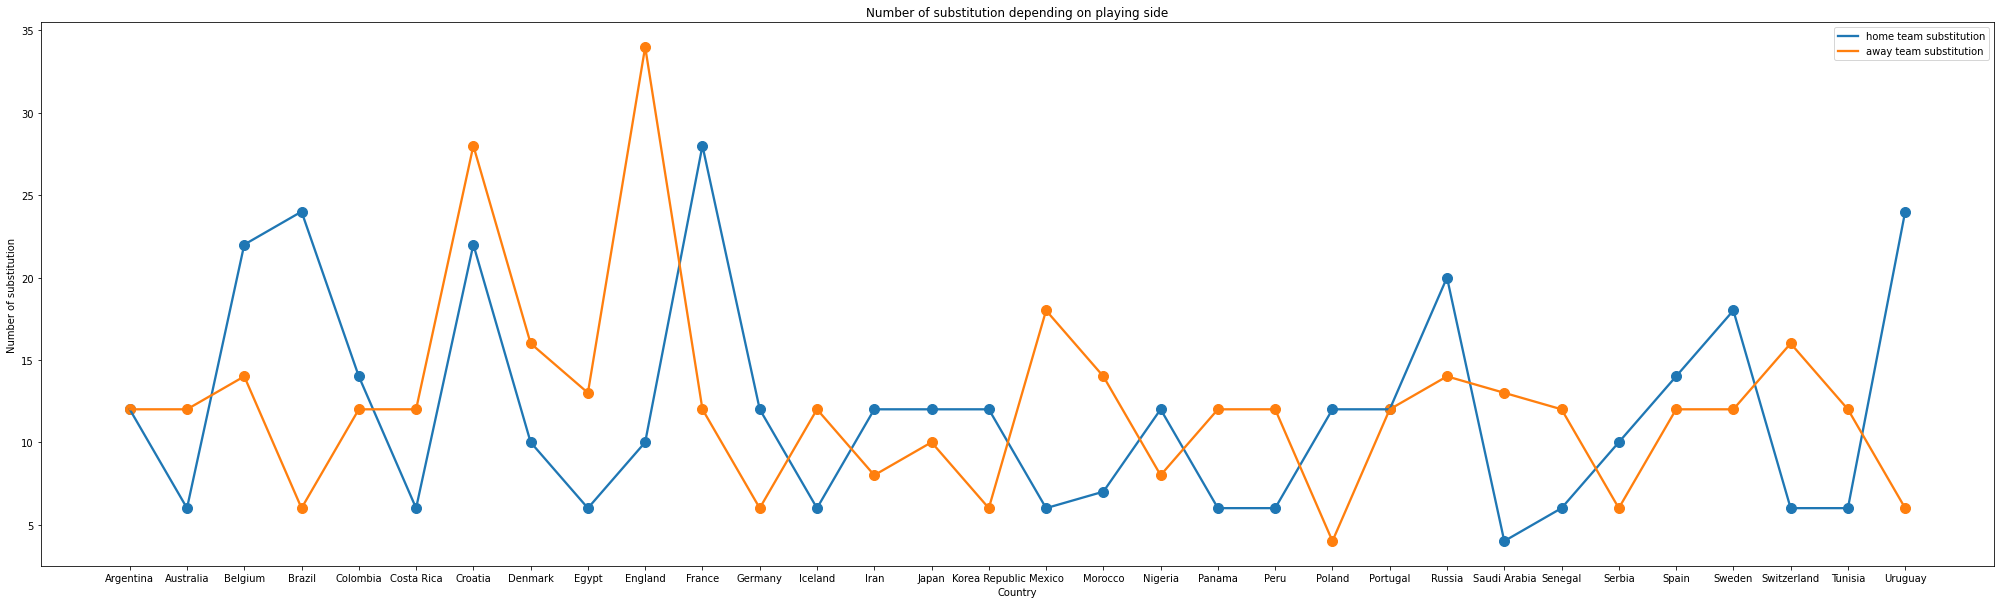

In [250]:
fig = plt.figure(figsize=(35, 10))
ax = fig.add_subplot(111)

ax.plot(home_subst['home_team_country'], home_subst['home_team_subst'], linewidth=2.3)
ax.plot(away_subst['away_team_country'], away_subst['away_team_subst'], linewidth=2.3)
ax.scatter(home_subst['home_team_country'], home_subst['home_team_subst'], s=100)
ax.scatter(away_subst['away_team_country'], away_subst['away_team_subst'], s=100)

plt.legend(['home team substitution', 'away team substitution'])
ax.set_title('Number of substitution depending on playing side')
plt.xlabel('Country')
plt.ylabel('Number of substitution')
plt.show()

**№4**

Analysis for №2.

---


As we can see on the first graph, Luzhniki Stadium is the most popular place for watching after game. It may be because its the newest stadium, so its more comfortable. Also, Luzhniki Stadium located in Moscow, Russia, and Moscow is the capital. 

Let's move to the second graph, Egypt has more substitutions over all the other countries. I can't tell why but it may be because of Egypt is one of the smallest country on FIFA, so there is less money than others to train players, so they are more weak.

The last, the third graph. As we can see, the most common outcome is a draw. Then, Croatia and Belgium have the same level of wins.




Analysis for №3


---

First graph. Belgium did more goals than others and they did it for home team. After Belgium goes Croatia. However they did more goals as an away team. England did the same number of goals for home team as for away team.

Second graph. England had more substitutions for away team than others. Germany had more substitutions for home team. Poland did the least number of Poland of substitutions for away team. Saudi Arabia did the least number of substitutions for home team. 